## Bitcoin Data Collection

Dataset Source : < https://www.alphavantage.co/documentation/ >

*Author : Ayesha Khatib*

#### Overview :
----
- The code in this notebook is for Bitcoin data extraction from Alphavantage website through their API using its API_key generated on the website. 
- I will be extracting daily Bitcoin data over the years i.e. between 2009 to (Nov) 2018.
- The data will be saved as a json file and then converted to a pandas dataframe.
- The bitcoin exchange currency considered is in USD but can be selected for any currency.

----

### Import the packages

In [94]:
import json
import urllib.request
import datetime
import pandas as pd
import io
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

%matplotlib inline

#### Enter Alphavantage API key as generated from the website.

In [95]:
API_KEY='SGMRXIIAG4HZICK1'

# specify a path to store the .json file, here its the local folder.
json_data_path = ['./btc.json']

#### Define functions to extract daily bitcoin data

----
Ref : <https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey={KEY}>

- Function = 'DIGITAL_CURRENCY_DAILY'
- symbol = BTC (digital currency)
- market = AUD (currency conversion, USD is the default currency) 
- apikey = got it from the website

In [96]:
QUERY_URL_JSON = "https://www.alphavantage.co/query?function={REQUEST_TYPE}&symbol={SYMBOL}&market=AUD&apikey={KEY}"


def _request_json(symbol,req_type):
    with urllib.request.urlopen(QUERY_URL_JSON.format(REQUEST_TYPE=req_type,SYMBOL=symbol,KEY=API_KEY)) as req:
        data = req.read().decode("UTF-8")
    return data

def get_daily_json_data(symbol):
    return json.loads(_request_json(symbol, 'DIGITAL_CURRENCY_DAILY'))

#### Getting the bitcoin data via the API

In [97]:
# getting bitcoin data from alpha vantage via api
json_btc = get_daily_json_data('BTC')

# save json data to file
with open(json_data_path[0], 'w') as outfile:
    json.dump(json_btc, outfile)

#### Function to clean the data and Dataframe creation

- getting meta data out of json
- metadata = json_data["Meta Data"]

In [98]:
def clean_data(json_data):
    #check if error
    
    #print(len(json_data))
    if len(json_data) < 2:
        return None
    
    # getting the keys of the json data
    key_data = list(json_data.keys())[1]
    #print ("key", key_data)
    
    # getting date/time series
    ts = json_data[key_data]
    #print ("time series", ts)
    
    # define a dataframe
    df = pd.DataFrame(ts).T
    
    # now split columns to get values
    df = df.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume",
    })
    
    # update the columns to make it easier use
    for col in ["Open", "High", "Low", "Close"]:
        if col in df.columns:
            df[col] = df[col].astype(float)
    
    # clean up some data
    df["Volume"] = df["Volume"].astype(float)
    df.index = pd.to_datetime(df.index)
    df.index.name = "Date"
    
    # return clean df and meta data
    return df #, metadata

#### time to clean the json data and return the dataframe

In [99]:
btc = clean_data(json_btc)

#### Print the shape

In [100]:
btc.shape

(1702, 10)

#### Function defined to print the data

In [101]:
def print_df (df):
    
    if df is not None:
        print ("------Bitcoin------")
        print ("Head")
        print (df.head(2))
        print ("")
        print ("Tail")
        print (df.tail(2))
        print ("")
    else:
        print ('No Bitcoin Data Available')

#### Print the the Bitcoin data

In [102]:
# now time to print data frame
print_df (btc)

------Bitcoin------
Head
           1a. open (AUD) 1b. open (USD) 2a. high (AUD) 2b. high (USD)  \
Date                                                                     
2018-11-27  5200.58041407  3756.35559621  5300.75427981  3830.06904690   
2018-11-26  5435.85743124  3930.12737912  5600.97264893  4061.20967424   

            3a. low (AUD)  3b. low (USD) 4a. close (AUD) 4b. close (USD)  \
Date                                                                       
2018-11-27  5005.10398551  3621.22681107   5247.84490629   3792.21193822   
2018-11-26  4979.95788886  3601.08459284   5203.35808459   3757.29805432   

                 Volume 6. market cap (USD)  
Date                                         
2018-11-27  1257.426687    4768428.49505681  
2018-11-26  1433.055520    5384416.71680278  

Tail
           1a. open (AUD) 1b. open (USD) 2a. high (AUD) 2b. high (USD)  \
Date                                                                     
2014-04-02   550.04924058   508.306

#### Printing the btc columns

In [103]:
btc.columns

Index(['1a. open (AUD)', '1b. open (USD)', '2a. high (AUD)', '2b. high (USD)',
       '3a. low (AUD)', '3b. low (USD)', '4a. close (AUD)', '4b. close (USD)',
       'Volume', '6. market cap (USD)'],
      dtype='object')

#### Saving the btc as csv

In [104]:
btc.to_csv('./btc_daily_aud_usd.csv',sep=',',encoding='utf-8')

### Creating a new dataframe
- I will be only with USD currency exchange Bitcoin price.

In [105]:
cols_usd = {'Open':[], 'High' : [], 'Low' : [], 'Close' : [], 'Volume' : []}

btc_usd = pd.DataFrame(data = cols_usd)

# Rename the column names
btc_usd['Open'] = btc['1b. open (USD)'].astype(float)
btc_usd['High'] = btc['2b. high (USD)'].astype(float)
btc_usd['Low'] = btc['3b. low (USD)'].astype(float)
btc_usd['Close'] = btc['4b. close (USD)'].astype(float)
btc_usd['Volume'] = btc['Volume'].astype(float)

#### Print the head and tail

In [106]:
btc_usd.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-27,3756.355596,3830.069047,3621.226811,3792.211938,1257.426687
2018-11-26,3930.127379,4061.209674,3601.084593,3757.298054,1433.055520
2018-11-25,3806.188554,4015.383030,3493.149634,3940.153059,1781.228238
2018-11-24,4316.809808,4359.097104,3745.408918,3828.484813,1293.822859
2018-11-23,4295.565392,4342.993136,4157.772410,4315.631247,977.073519


In [107]:
btc_usd.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-05,472.194844,481.680095,443.312122,443.428306,27.024272
2014-04-04,462.059538,480.879066,433.032072,472.194844,71.364098
2014-04-03,478.282521,484.206041,436.150630,462.059538,155.561775
2014-04-02,508.306595,522.303962,459.522525,478.474132,121.558450
2014-04-01,465.297497,563.106823,465.297497,473.101296,141.883323


In [108]:
btc.shape

(1702, 10)

In [109]:
btc_usd.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [110]:
btc_usd.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [111]:
# Saving the btc as csv
btc_usd.to_csv('./btc_daily_usd.csv',sep=',',encoding='utf-8')

## Time series Visualisation

#### Plotting the BTC High from 2014 to (Nov) 2018

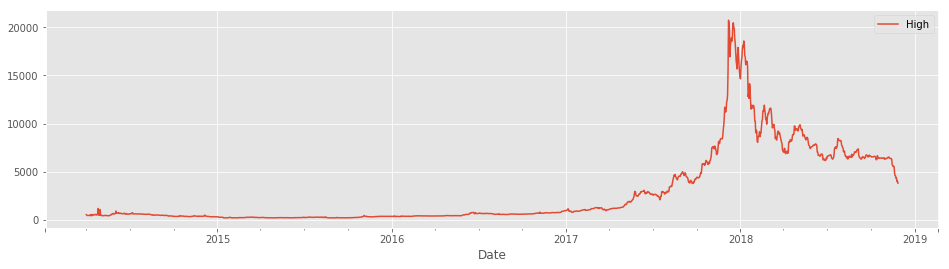

In [112]:
time_usd = pd.Series(data=btc_usd['High'].values, index=btc.index)
time_usd.plot(figsize=(16, 4), label="High", legend=True)

#### Plotting the BTC Market Volume from 2014 to (Nov) 2018

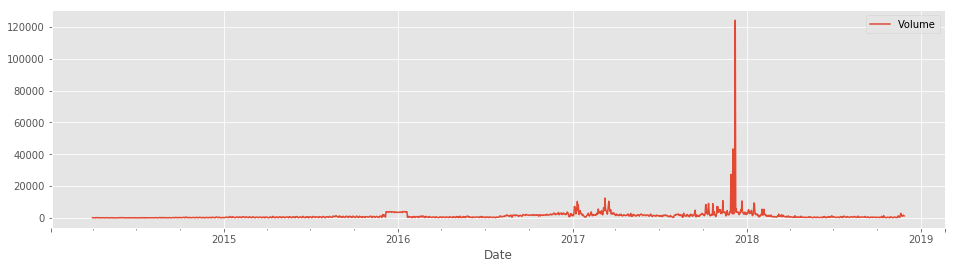

In [118]:
time_usd = pd.Series(data=btc_usd['Volume'].values, index=btc.index)
time_usd.plot(figsize=(16, 4), label="Volume", legend=True)

#### Layered Time Series -- High and Low

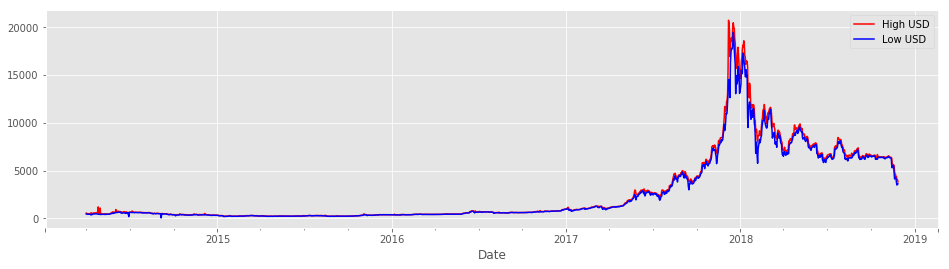

In [114]:
time_usd=pd.Series(data=btc_usd['High'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 4), label="High USD", legend=True, color='r')

time_usd = pd.Series(data=btc_usd['Low'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 4), label="Low USD", legend=True,color='b')
plt.show()

#### Layered Time Series -- High, Low and Closing BTC price

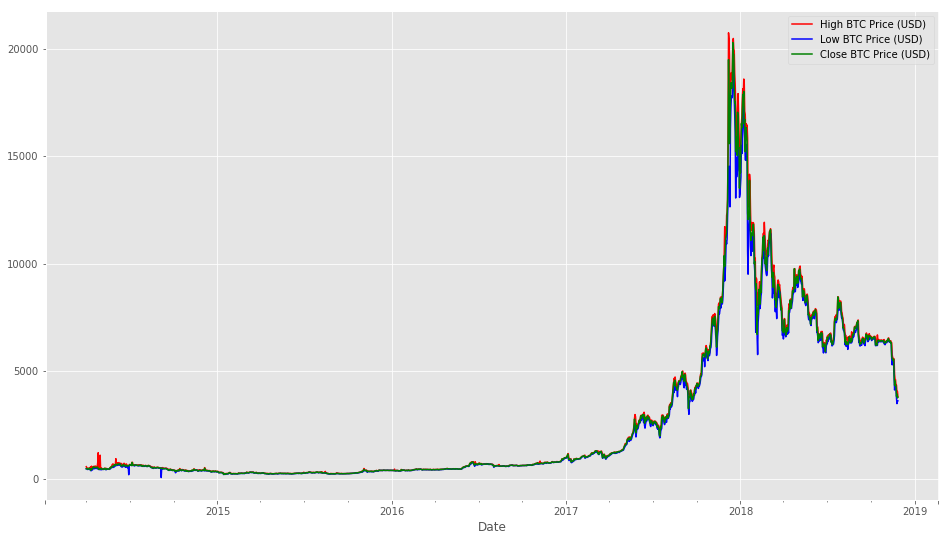

In [117]:
time_usd=pd.Series(data=btc_usd['High'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 9), label="High BTC Price (USD)", legend=True, color='r')

time_usd = pd.Series(data=btc_usd['Low'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 9), label="Low BTC Price (USD)", legend=True,color='b')

time_usd = pd.Series(data=btc_usd['Close'].values,index=btc_usd.index)
time_usd.plot(figsize=(16, 9), label="Close BTC Price (USD)", legend=True,color='g')

plt.show()

### Moving Average of the Time-series

In [158]:
def calculate_ma(df, colname, days):
    new_col_name = colname + '_ma_' + str(days)
    df[new_col_name] = df[colname].rolling(window=days, min_periods=0).mean()
    return df

#### Plot graphs of Close and Volume values for 100 days moving average, otherwise specify your own

In [159]:
def plot_moving_average( df, col1='Close', col2='Volume'):

    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, sharex=ax1)
    
    #moving average based on col1 name
    days = 100
    col3 = col1 + '_ma_' + str(days)
    
    ax1.plot(df.index, df[col1])
    ax1.plot(df.index, df[col3])
    ax2.bar(df.index, df[col2])
    
    ax1.legend()
    ax2.legend()
    plt.show()

In [160]:
includeCols = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in includeCols:
    # create 100 days moving average
    days = 100
    if col in includeCols:
        calculate_ma(btc_usd, col, days)
        

No handles with labels found to put in legend.


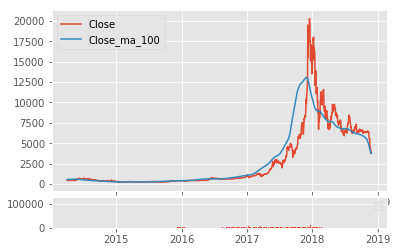

In [161]:
plot_moving_average(btc_usd)